In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
import warnings
warnings.filterwarnings("ignore")


In [123]:
df = pd.read_csv("SteamJeeraMasinoDataFinal.csv")

In [124]:
df.head()

Moisture (14%)  Foreign Matter (0.2%)  Broken (5%)  \
0            11.9                    0.0          3.7   
1            12.2                    0.1          4.2   
2            11.9                    0.0          3.5   
3            12.0                    0.0          3.9   
4            12.1                    0.0          5.0   

   Red & Chalky grains (5%)  Damaged Grain (1%)  Discolored grain(1%)  \
0                       2.8                 0.7                   0.5   
1                       2.4                 0.4                   0.6   
2                       1.3                 0.6                   0.4   
3                       1.5                 0.5                   0.5   
4                       3.6                 0.9                   0.4   

   Mix lower class (8%)  Final Value Grade  
0                   6.2        6.662     A  
1                   5.9        6.828     B  
2                   5.7        6.482     A  
3                   6.2        6.590     A  
4                   5.7        6.980     B

In [125]:
df.isnull().sum()

Moisture (14%)              0
Foreign Matter (0.2%)       0
Broken (5%)                 0
Red & Chalky grains (5%)    0
Damaged Grain (1%)          0
Discolored grain(1%)        0
Mix lower class (8%)        0
Final Value                 0
Grade                       0
dtype: int64

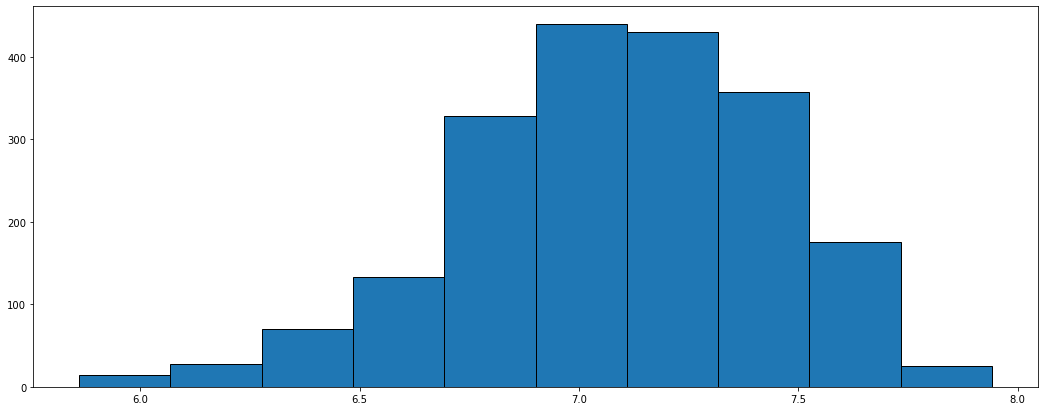

In [126]:
plt.figure(figsize = (18,7))
plt.hist("Final Value",data = df, edgecolor = 'k')
plt.show()

In [127]:
print(df["Final Value"].max())
print(df["Final Value"].min())
print(df["Final Value"].mean())

7.942
5.86
7.0881384999999995


In [128]:
df.drop(df.columns[[6,7 ]], axis = 1, inplace = True)

In [129]:
df

Moisture (14%)  Foreign Matter (0.2%)  Broken (5%)  \
0               11.9                    0.0          3.7   
1               12.2                    0.1          4.2   
2               11.9                    0.0          3.5   
3               12.0                    0.0          3.9   
4               12.1                    0.0          5.0   
...              ...                    ...          ...   
1995            13.3                    0.1          4.5   
1996            12.9                    0.1          4.9   
1997            12.2                    0.2          4.2   
1998            13.1                    0.0          4.3   
1999            13.4                    0.2          4.9   

      Red & Chalky grains (5%)  Damaged Grain (1%)  Discolored grain(1%) Grade  
0                          2.8                 0.7                   0.5     A  
1                          2.4                 0.4                   0.6     B  
2                          1.3                 0.6                   0.4     A  
3                          1.5                 0.5                   0.5     A  
4                          3.6                 0.9                   0.4     B  
...                        ...                 ...                   ...   ...  
1995                       1.6                 0.9                   0.6     B  
1996                       1.4                 0.3                   0.5     B  
1997                       1.5                 0.5                   0.9     A  
1998                       1.6                 0.6                   0.1     B  
1999                       1.8                 0.4                   0.1     B  

[2000 rows x 7 columns]

In [130]:
grade = df['Grade']

In [131]:
grade.head()

0    A
1    B
2    A
3    A
4    B
Name: Grade, dtype: object

In [132]:
grade.astype(object).eq("B").sum()

1262

In [133]:
grade.astype(object).eq("C").sum()

301

In [134]:
grade.astype(object).eq("A").sum()

437

In [135]:
df['Grade'] = df['Grade'].replace({'A':0 , 'B':1, 'C':2})

In [136]:
df

Moisture (14%)  Foreign Matter (0.2%)  Broken (5%)  \
0               11.9                    0.0          3.7   
1               12.2                    0.1          4.2   
2               11.9                    0.0          3.5   
3               12.0                    0.0          3.9   
4               12.1                    0.0          5.0   
...              ...                    ...          ...   
1995            13.3                    0.1          4.5   
1996            12.9                    0.1          4.9   
1997            12.2                    0.2          4.2   
1998            13.1                    0.0          4.3   
1999            13.4                    0.2          4.9   

      Red & Chalky grains (5%)  Damaged Grain (1%)  Discolored grain(1%)  \
0                          2.8                 0.7                   0.5   
1                          2.4                 0.4                   0.6   
2                          1.3                 0.6                   0.4   
3                          1.5                 0.5                   0.5   
4                          3.6                 0.9                   0.4   
...                        ...                 ...                   ...   
1995                       1.6                 0.9                   0.6   
1996                       1.4                 0.3                   0.5   
1997                       1.5                 0.5                   0.9   
1998                       1.6                 0.6                   0.1   
1999                       1.8                 0.4                   0.1   

      Grade  
0         0  
1         1  
2         0  
3         0  
4         1  
...     ...  
1995      1  
1996      1  
1997      0  
1998      1  
1999      1  

[2000 rows x 7 columns]

In [137]:
X = df.drop('Grade', axis =1)
y = df['Grade']

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 10)

In [140]:
len(y_train)

1400

In [141]:
y_train

1443    1
1126    1
729     1
1094    1
73      0
       ..
1393    0
1344    1
527     1
1149    0
1289    1
Name: Grade, Length: 1400, dtype: int64

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logmodel = LogisticRegression()
# logmodel=LogisticRegression(max_iter=650)
logmodel.fit(X_train,y_train)

LogisticRegression()

In [144]:
logmodel.score(X_test, y_test)

0.8616666666666667

In [145]:
logmodel.score(X_train, y_train)

0.8907142857142857

In [146]:
logmodel.predict([[15,0.2,13,4,1,1]])

array([2], dtype=int64)

In [161]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logmodel, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.91  0.94  0.935 0.965 0.88  0.9   0.95  0.885 0.935 0.925]


In [162]:
scores.mean()

0.9225000000000001

In [149]:
    param_range = np.arange(1, 250, 2)

    train_scores, test_scores = validation_curve(LogisticRegression(),
                                  X, y, param_name="C", param_range=param_range,
                                  cv=4, scoring="accuracy", n_jobs=-1)

In [150]:
# LogisticRegression().get_params().keys()

In [151]:
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

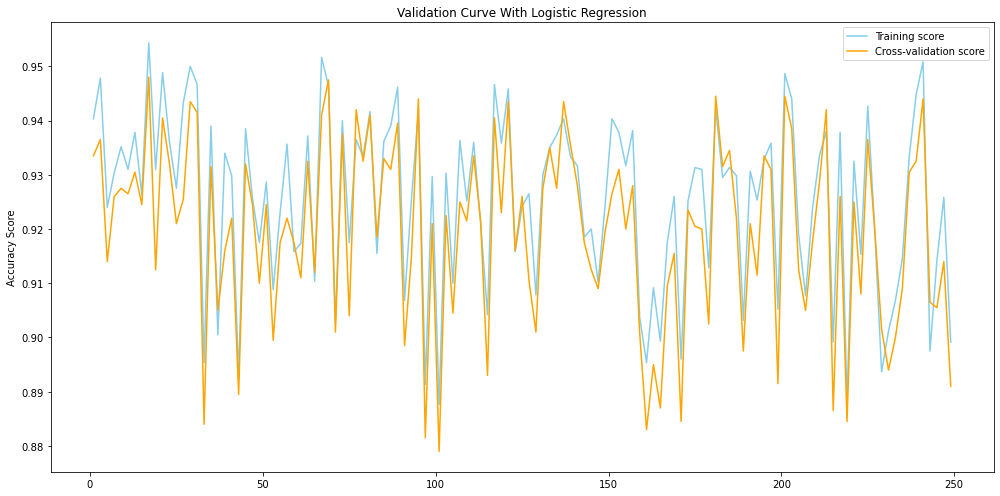

In [152]:
    plt.subplots(1, figsize=(14,7))
    plt.plot(param_range, train_mean, label="Training score", color="skyblue")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="orange")
#     plot accuracy bands for training and testing
#     plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
#     plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
    plt.title("Validation Curve With Logistic Regression")

    plt.ylabel("Accuracy Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

In [163]:
train_mean.mean()

0.9255173333333333

In [164]:
test_mean.mean()

0.9195920000000001